## **Trabajo Final Grupal: EDA - Bank Subscription**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

Alumnos: Franco, Olivia (172.434-4) y Muñoz Little, Santiago (168.113-8)

El presente trabajo práctico tiene el objetivo de explorar el dataset de un banco, encontrar relaciones entre sus variables, anomalías y cualquier información que resulte útil para analizar la naturaleza de los clientes.

#### Variables
- Age: edad del cliente.
- Job: tipo de empleo del cliente.
- Marital status: estado civil.
- Education: educación máxima alcanzada por el cliente.
- Credit: si tiene deuda de crédito o no.
- Balance: Promedio de salgo en la cuenta en el año.
- Housing loan: si tiene seguro de hogar o no.
- Personal loan: si tiene préstamos o no.
- Contact: tipo de contacto con el cliente.
- Last contact day: último dia de contacto con el cliente en el mes.
- Last contact month: último mes de contacto con el cliente en el año.
- Last contact duration: duración del último contacto con el cliente medido en segundos.
- Campaign: cantidad de contactos al cliente durante esta campaña, incluye el último contacto.
- Pdays: cantidad de días que pasaron del último contacto con el cliente de una campaña anterior (-1 significa que no hubo contacto previo).
- Previous: cantidad de contactos previos a esta campaña para cada cliente.
- Poutcome: performance de la campaña de marketing anterior para este cliente.
- Subscription: Si el cliente accede a la campaña (1) o no (0).


### Importación de librerías

In [1]:
## Importamos librerías de manipulación de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importación de dataset

In [2]:
#Importamos el dataset y lo guardamos bajo el nombre 'bankdf'
bankdf = pd.read_csv('bank_subscription.csv', sep=";")
#Visualizo las primeras 5 filas para asegurarme que se hayan cargado correctamente
bankdf.head(10)

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58.0,NaN,NaN,NaN,no,2143.0,yes,NaN,unknown,5,may,261.0,1,-1.0,0,unknown,0
1,44.0,technician,single,secondary,no,NaN,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,0
2,33.0,entrepreneur,NaN,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,NaN,0,unknown,0
3,47.0,NaN,married,unknown,no,1506.0,NaN,no,unknown,5,may,92.0,1,-1.0,0,unknown,0
4,33.0,unknown,single,unknown,NaN,1.0,no,no,unknown,5,may,NaN,1,NaN,0,unknown,0
5,35.0,NaN,married,tertiary,no,231.0,yes,no,unknown,5,may,139.0,1,-1.0,0,unknown,0
6,28.0,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217.0,1,-1.0,0,unknown,0
7,42.0,entrepreneur,divorced,tertiary,yes,NaN,yes,no,unknown,5,may,380.0,1,-1.0,0,unknown,0
8,58.0,retired,married,NaN,no,121.0,yes,no,unknown,5,may,50.0,1,-1.0,0,unknown,0
9,43.0,technician,single,secondary,no,593.0,yes,no,unknown,5,may,55.0,1,-1.0,0,unknown,0


### **Forma del Dataset**

In [3]:
#Imprimimos las dimensiones del dataset
filas = np.shape(bankdf)[0]
print(f'Filas: {filas}')
columnas = np.shape(bankdf)[1]
print(f'Columnas: {columnas}')

Filas: 45211
Columnas: 17


In [4]:
#Imprimimos los nombres de las columnas
nombre_columnas = bankdf.columns.values
nombre_columnas

array(['Age', 'Job', 'Marital Status', 'Education', 'Credit',
       'Balance (euros)', 'Housing Loan', 'Personal Loan', 'Contact',
       'Last Contact Day', 'Last Contact Month', 'Last Contact Duration',
       'Campaign', 'Pdays', 'Previous', 'Poutcome', 'Subscription'],
      dtype=object)

In [5]:
# Obtenemos el tipo de variable de cada columna
tipos_de_variables = bankdf.dtypes
tipos_de_variables

Age                      float64
Job                       object
Marital Status            object
Education                 object
Credit                    object
Balance (euros)          float64
Housing Loan              object
Personal Loan             object
Contact                   object
Last Contact Day           int64
Last Contact Month        object
Last Contact Duration    float64
Campaign                   int64
Pdays                    float64
Previous                   int64
Poutcome                  object
Subscription               int64
dtype: object

In [6]:
# Revisamos si existen columnas que contengan valores faltantes (NaNs)
col_nulls = bankdf.isnull().any()
col_nulls

Age                       True
Job                       True
Marital Status            True
Education                 True
Credit                    True
Balance (euros)           True
Housing Loan              True
Personal Loan             True
Contact                  False
Last Contact Day         False
Last Contact Month       False
Last Contact Duration     True
Campaign                 False
Pdays                     True
Previous                 False
Poutcome                 False
Subscription             False
dtype: bool

Dado que gran cantidad de columnas poseen valores nulos, debemos analizar qué cantidad y tipo de información tiene cada una de las variables para definir qué tratamiento se le dará a los nulos. De esta forma, buscamos los valores únicos de las variables categóricas (object) para anlizar que información brindan.

In [7]:
# Obtenemos los valores únicos de la variable Job
valores_unicos_job = bankdf['Job'].unique()
print('Los valores únicos de la variable Job son:', valores_unicos_job)
# Obtenemos los valores únicos de la variable Marital Status
valores_unicos_ms = bankdf['Marital Status'].unique()
print('Los valores únicos de la variable Marital Status son:', valores_unicos_ms)
# Obtenemos los valores únicos de la variable Education
valores_unicos_ed = bankdf['Education'].unique()
print('Los valores únicos de la variable Education son:', valores_unicos_ed)
# Obtenemos los valores únicos de la variable Credit
valores_unicos_cr = bankdf['Credit'].unique()
print('Los valores únicos de la variable Credit son:', valores_unicos_cr)
# Obtenemos los valores únicos de la variable Housing Loan
valores_unicos_hs = bankdf['Housing Loan'].unique()
print('Los valores únicos de la variable Housing Loan son:', valores_unicos_hs)
# Obtenemos los valores únicos de la variable Personal Loan
valores_unicos_ps = bankdf['Personal Loan'].unique()
print('Los valores únicos de la variable Personal Loan son:', valores_unicos_ps)
# Obtenemos los valores únicos de la variable Contact
valores_unicos_cnt = bankdf['Contact'].unique()
print('Los valores únicos de la variable Contact son:', valores_unicos_cnt)
# Obtenemos los valores únicos de la variable Last Contact Month
valores_unicos_lcm = bankdf['Last Contact Month'].unique()
print('Los valores únicos de la variable Last Contact Month son:', valores_unicos_lcm)
# Obtenemos los valores únicos de la variable Poutcome
valores_unicos_po= bankdf['Poutcome'].unique()
print('Los valores únicos de la variable Poutcome:', valores_unicos_po)

Los valores únicos de la variable Job son: [nan 'technician' 'entrepreneur' 'unknown' 'management' 'retired' 'admin.'
 'services' 'blue-collar' 'self-employed' 'unemployed' 'housemaid'
 'student']
Los valores únicos de la variable Marital Status son: [nan 'single' 'married' 'divorced']
Los valores únicos de la variable Education son: [nan 'secondary' 'unknown' 'tertiary' 'primary']
Los valores únicos de la variable Credit son: ['no' nan 'yes']
Los valores únicos de la variable Housing Loan son: ['yes' nan 'no']
Los valores únicos de la variable Personal Loan son: [nan 'no' 'yes']
Los valores únicos de la variable Contact son: ['unknown' 'cellular' 'telephone']
Los valores únicos de la variable Last Contact Month son: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Los valores únicos de la variable Poutcome: ['unknown' 'failure' 'other' 'success']


Dado que estamos trabajando para lograr un Análisis Exploratorio de Datos, imputar los nulos no es la mejor opción, ya que estaríamos reemplazando los datos faltantes por la media o moda y, al visualizarlo, brindaría información errónea. Es por eso, que tomamos la decisión de eliminar los registros nulos. Por otra parte, se observa la presencia de valores "unknown" en las distintas variables que, de manera implícita, también representan nulos ya que no dan información. Sin embargo, para el caso de los unknowns, decidimos mantener los registros que lo contengan y solamente eliminarlos al visualizar puntualmente la variable que los posea, para evitar perder tanta información.

In [8]:
# Cantidad de valores nulos
null_counts = bankdf.isnull().sum().sort_values(ascending=False)
# Cantidad de valores unknown
unknown_counts = bankdf.apply(lambda x: x.value_counts().get('unknown', 0))
# Suma del total de nulos y unknown por cada columna
sum_nulls_unknowns = bankdf.isnull().sum()+bankdf.apply(lambda x: x.value_counts().get('unknown', 0))
# Porcentaje de lo que representa para cada columna
percent = (sum_nulls_unknowns/len(bankdf))
# Mostramos los cuatro resultados en conjunto
datosfaltantes = pd.concat([null_counts,unknown_counts,sum_nulls_unknowns, percent], axis=1, keys=['Nulls','Unknown', 'Sum','Percent'])
datosfaltantes = datosfaltantes.sort_values(by='Percent', ascending=False)
datosfaltantes

,Nulls,Unknown,Sum,Percent
Poutcome,0,36959,36959,0.817478
Contact,0,13020,13020,0.287983
Pdays,7686,0,7686,0.170003
Housing Loan,7686,0,7686,0.170003
Personal Loan,7686,0,7686,0.170003
Last Contact Duration,7686,0,7686,0.170003
Education,4973,1666,6639,0.146845
Job,4973,257,5230,0.115680
Balance (euros),4973,0,4973,0.109995
Credit,4973,0,4973,0.109995


In [76]:
# Eliminamos los registros nulos en todo el dataset
bankdf_snul = bankdf.dropna()
bankdf_snul

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
6,28.0,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217.0,1,-1.0,0,unknown,0
9,43.0,technician,single,secondary,no,593.0,yes,no,unknown,5,may,55.0,1,-1.0,0,unknown,0
14,57.0,services,married,secondary,no,162.0,yes,no,unknown,5,may,174.0,1,-1.0,0,unknown,0
23,25.0,services,married,secondary,no,50.0,yes,no,unknown,5,may,342.0,1,-1.0,0,unknown,0
24,40.0,retired,married,primary,no,0.0,yes,yes,unknown,5,may,181.0,1,-1.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23.0,student,single,tertiary,no,113.0,no,no,cellular,17,nov,266.0,1,-1.0,0,unknown,1
45205,25.0,technician,single,secondary,no,505.0,no,yes,cellular,17,nov,386.0,2,-1.0,0,unknown,1
45207,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,1
45208,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,1


Habiendo tratado todos los nulos, observamos que nos quedamos con el 23,5% de los datos, que implican 10630 registros, por lo que podemos avanzar hacia el Análisis Exploratorio de Datos.

### **Análisis Exploratorio de Datos**

In [10]:
# A continuación, presentamos las métricas de cada columna con el comando describe
# El .T se utiliza para que las métricas esten en las columnas y las variables en las filas
bankdf_snul.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10630.0,41.089276,10.652741,18.0,33.0,39.0,49.0,95.0
Balance (euros),10630.0,1357.860960,3028.454521,-2604.0,72.0,446.0,1454.0,81204.0
Last Contact Day,10630.0,15.696331,8.328843,1.0,8.0,16.0,21.0,31.0
Last Contact Duration,10630.0,256.620978,259.270058,0.0,104.0,180.0,316.0,4918.0
Campaign,10630.0,2.780245,3.113898,1.0,1.0,2.0,3.0,55.0
Pdays,10630.0,40.912888,100.954838,-1.0,-1.0,-1.0,-1.0,828.0
Previous,10630.0,0.563311,1.861234,0.0,0.0,0.0,0.0,51.0
Subscription,10630.0,0.112982,0.316586,0.0,0.0,0.0,0.0,1.0


De esta matriz podemos obtener información valiosa ya que, de manera numérica, nos permite ver cómo es la distribución de las variables. 
- Age: la distribución de la edad pareciera relativamente normal (se debe analizar de manera gráfica), con un mínimo de 18 años (la cual debe ser la edad a partir de la cual un individuo puede ser cliente del banco) y 95 años.
- Balance: observando los valores, podemos detectar rápidamente la amplia distribución que tiene esta variable, ya que la media es 1357 y la mediana 446, lo que habla de gran presencia de outliers (se denota que el máximo es 81204, muy lejano a los dos valores antes mencionados). También, se destaca la presencia de balances negativos.
- Last Contact Day: no muestra información valiosa ya que es el día del último contacto y tiene una distribución bastante uniforme.
- Last Contact Duration: se denota la presencia de outliers, ya que el 75% de los datos llegan a 316 y el máximo es 4918. Esto se puede comprobar de manera gráfica. 
- Campaign: acá también hay outliers. Puede ser interesante analizar si tiene alguna relación con las suscripciones, es decir, si a mayor cantidad de contactos con el cliente se logra la suscripción.
- Pdays: es muy notorio que no hubo contacto previo con muchos de los clientes de una campaña anterior, ya que hasta el 75% el valor sigue siendo -1. Además, observamos que el máximo es 828, por lo que la distribución posee outliers. Dada la distribución tan concentrada, sabemos que graficar Pdays no va a brindar información, ya que predominarían los outliers.
- Previous: acá pasa algo similar a Pdays, porque hasta el 75% es 0, es decir, no hubo contactos previos a esta campaña para cada cliente y hay un máximo de 51.
- Subscription: dado que es una variable categórica encubierta en 0 y 1, no muestra gran infomación, salvo demostrar que hay mayor concentración de clientes no suscriptos, dado que hasta el 75% sigue tomando valor 0. Esto debe ser visualizado.

A continuación, generaremos un pairplot para analizar como se distribuyen estas variables, haciendo scatterplots por cada par de variables y usando de hue la variable Subscription. En la diagonal, se presenta un histograma.

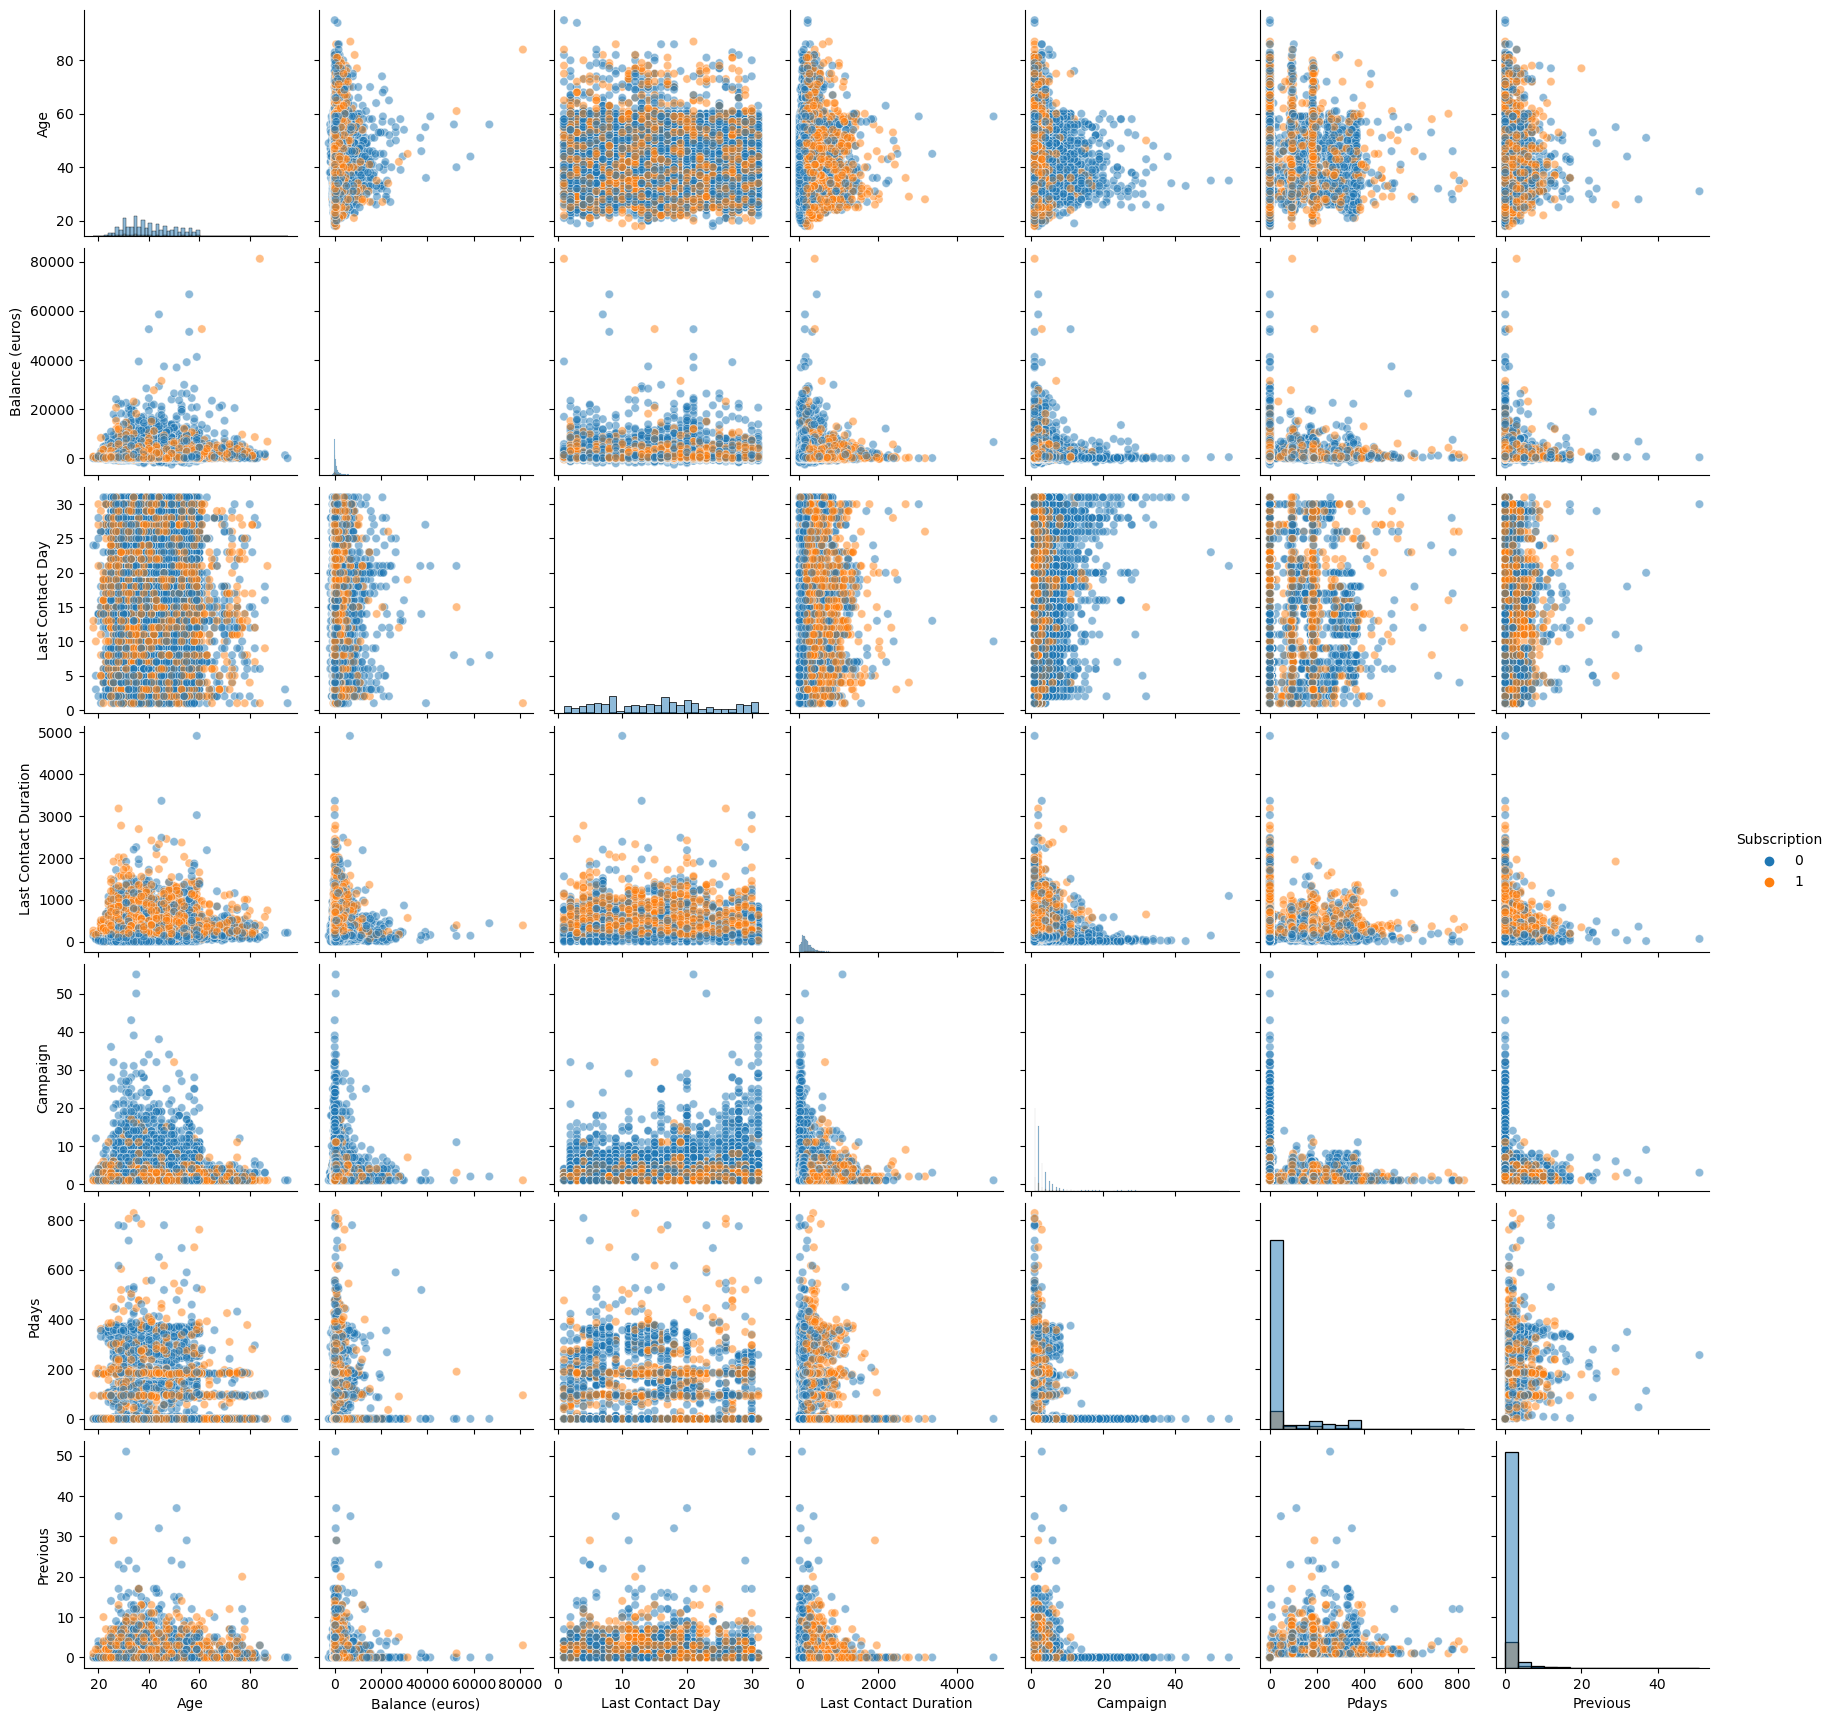

In [58]:
# Haremos un pairplot en funcion de las suscripciones 
sns.pairplot(bankdf_snul, hue='Subscription', diag_kind='hist',plot_kws={'alpha': 0.5})
plt.show()

Agregandole transparencia a los puntos en el pairplot para poder entender su concentración y distribución, vemos que no hay distribuciones claras y definidas para los distintos pares de variables, por lo que no obtenemos información del comportamiento de los clientes a partir de este gráfico. La única conclusión preliminar, que más adelante investigaremos con profundidad, es que a mayor cantidad de contactos (campaign) pareciera que hay mayor rechazo a la campaña actual, ya que a medida que subimos en el eje y predomina la presencia de "puntos azules", es decir, fracasos de la campaña actual.

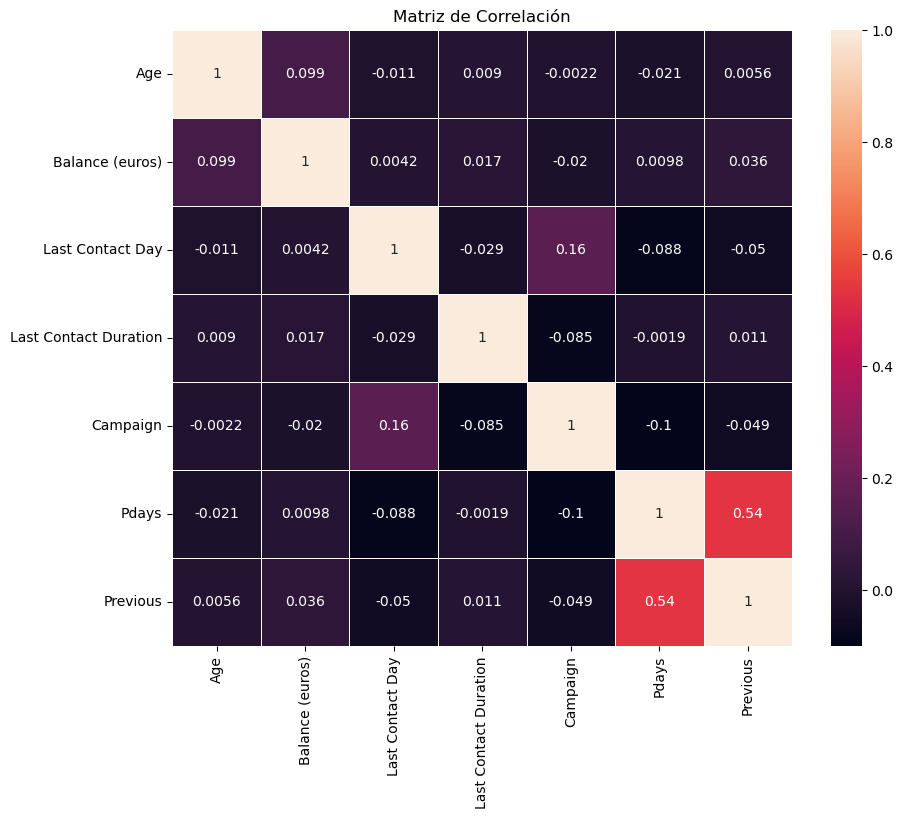

In [60]:
# Quitamos la variable Subscription ya que es una variable categórica expresada numéricamente
bankdf_snulCORR = bankdf_snul.drop('Subscription', axis=1)
# Realizamos la matriz de correlación entre las distintas variables del data set
matriz_correlacion = bankdf_snulCORR.corr(numeric_only=True)
plt.figure(figsize=(10, 8)) 
sns.heatmap(matriz_correlacion, annot=True, linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

En la matriz podemos observar que solo un par de variables tiene una correlación significativa: Pdays y Previous. Denotamos una correlación lineal positiva, es decir que tienen una relación directamente proporcional. Es una relación bastante fuerte, ya que alcanza 0,54. Al analizar el signficado de las variables (siendo Pdays días que pasaron desde el último contacto y Previous cantidad de contactos previos a esta campaña), vemos que esta distribución se da porque hay gran cantidad de Pdays=-1, lo que signfica que no hubo contactos, por lo que Previous va a ser 0. Es por eso que indica una gran correlación entre las dos variables. 

Debemos recordar que la correlación de por sí no indica causalidad, solo indica covarianza lineal entre las dos variables. A su vez, el hecho de que todos los otros pares de variables tengan valores cercanos a 0 no indican que no existe relación entre ellos, sino que implica que no existe una relación lineal.

A continuación, haremos un análisis detallado de algunas variables que nos resultan vitales para el análisis y luego algunos análisis complementarios de las relaciones.

#### **Feature: Subscription**
Analizaremos la distribución de Subscription y su relación con otras variables. En los apartados de otras variables se retomará la relación con las suscripciones.

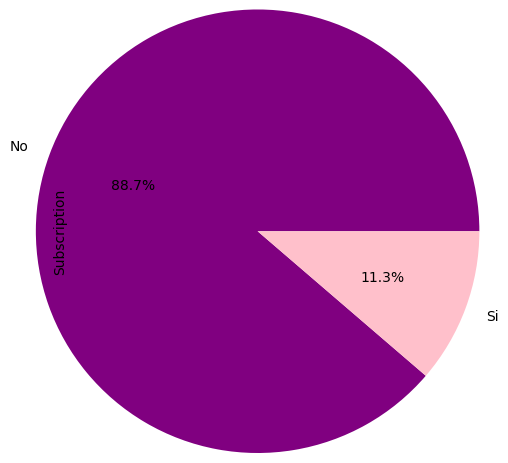

In [12]:
# Hacemos un piechart para visualizar la distribución
data = bankdf_snul["Subscription"].value_counts().plot(kind="pie",
        radius=1.5, labels=['No','Si'], autopct="%.1f%%", colors = ['Purple', 'Pink'])

Vemos que casi el 90% de los datos son negativos, es decir, no suscriptos. Esto puede ser información valiosa para el modelo de aprendizaje (ya que debemos tomar medidas para estabilizar las muestras) y también para medir el rendimiento de la campaña. Al observar estos resultados, los encargados de realizarla deben proponerse encontrar las causas de los fracasos y aplicar medidas correctivas.
A continuación, veremos la distribución de Poutcome, que muestra la performance de la campaña anterior, sin tener en cuenta los unknowns.

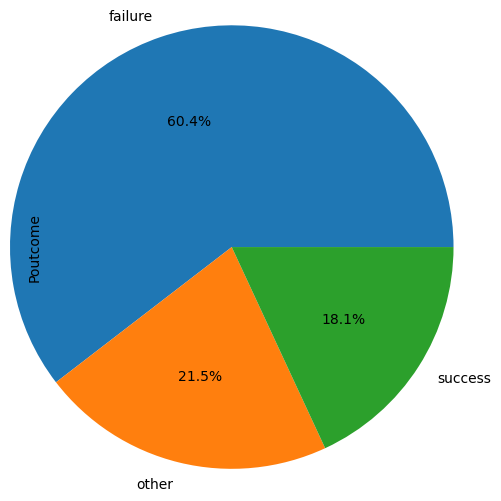

In [14]:
# Haremos un piechart para la variable Poutcome sin 'unknown'
outcome_real= bankdf_snul['Poutcome']
outcome_real = outcome_real.replace("unknown", None)
outcome_real = outcome_real.dropna()
data = outcome_real.value_counts().plot(kind="pie",
        radius=1.5, autopct="%.1f%%")

Observamos que el porcentaje de success era un poco mejor que el actual, por lo que sería interesante comparar el éxito, fracaso u otro de la campaña anterior con respecto a la campaña actual.

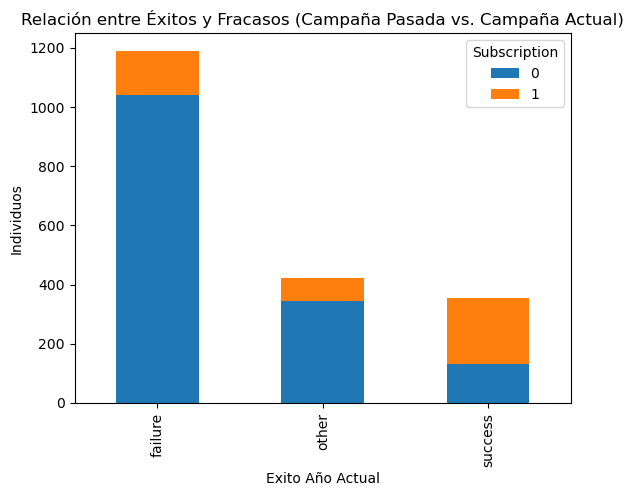

In [15]:
# Generamos una matriz solo con Poutcome y Subscription
outcome_real2 = bankdf_snul[['Poutcome', 'Subscription']]

# Filtramos los valores 'unknown' de Poutcome y eliminamos las filas correspondientes
outcome_real2 = bankdf_snul[bankdf_snul['Poutcome'] != 'unknown']

# Contamos la frecuencia de éxitos y fracasos para cada año
count_data = outcome_real2.groupby(['Poutcome', 'Subscription']).size().unstack()

# Hacemos un gráfico de barras apiladas
count_data.plot(kind='bar', stacked=True)
plt.xlabel('Éxito Año Actual')
plt.ylabel('Individuos')
plt.title('Relación entre Éxitos y Fracasos (Campaña Pasada vs. Campaña Actual)')

# Mostramos el gráfico
plt.show()

Se visualiza la gran relación entre los individuos que suscribieron a la campaña anterior y los que se suscribieron a la campaña actual, por lo que es un punto interesante para la toma de decisiones. En el caso de failure, se puede analizar qué llevó a los clientes a suscribirse a la campaña actual, habiendo rechazado la anterior y analizar si esos factores pueden ser un patrón que se magnifique y logre revertir más clientes que habían rechazado para que acepten la campaña actual.
A continuación, creemos que puede resultar interesante analizar la suscripción a la campaña actual dependiendo de la posesión de crédito, seguro del hogar y préstamos por parte del cliente.

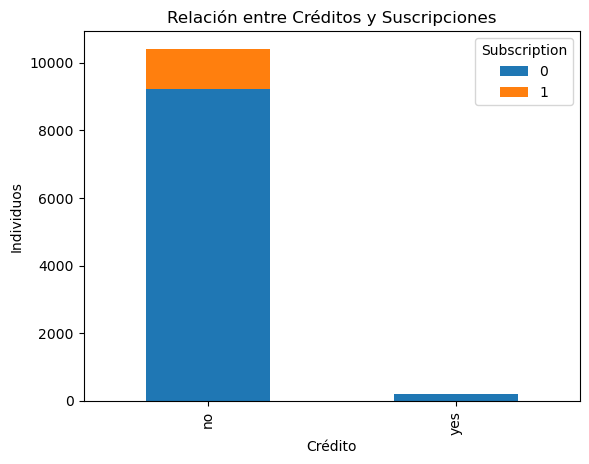

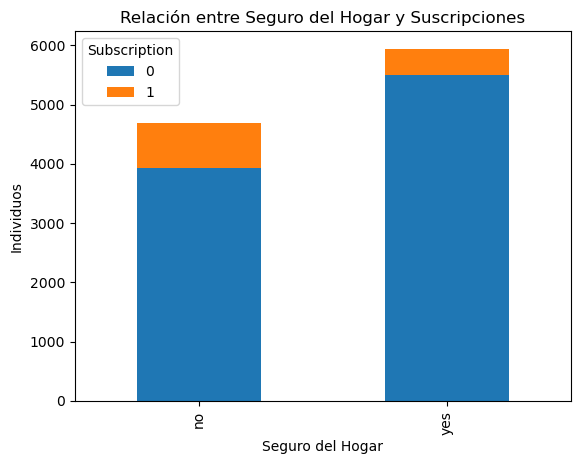

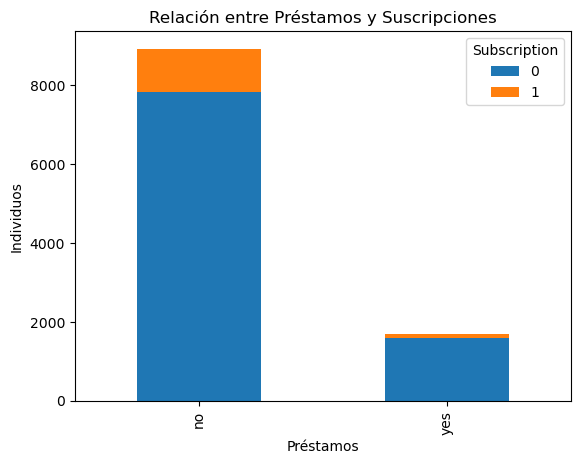

In [47]:
# Matriz para Credit y Subscription
outcome_realC = bankdf_snul[['Credit', 'Subscription']]

# Filtramos los valores 'unknown' de Credit y eliminamos las filas correspondientes
outcome_realC = bankdf_snul[bankdf_snul['Credit'] != 'unknown']

# Contamos la frecuencia 
count_dataC = outcome_realC.groupby(['Credit', 'Subscription']).size().unstack()

# Graficamos con barras apiladas
count_dataC.plot(kind='bar', stacked=True)
plt.xlabel('Crédito')
plt.ylabel('Individuos')
plt.title('Relación entre Créditos y Suscripciones')
plt.show()

# Matriz para Housing Loan y Subscription
outcome_realHL = bankdf_snul[['Housing Loan', 'Subscription']]

# Filtramos los valores 'unknown' de Housing Loan y eliminar las filas correspondientes
outcome_realHL = bankdf_snul[bankdf_snul['Housing Loan'] != 'unknown']

# Contamos la frecuencia
count_dataHL = outcome_realHL.groupby(['Housing Loan', 'Subscription']).size().unstack()

# Graficamos con barras apiladas
count_dataHL.plot(kind='bar', stacked=True)
plt.xlabel('Seguro del Hogar')
plt.ylabel('Individuos')
plt.title('Relación entre Seguro del Hogar y Suscripciones')
plt.show()

# Matriz para Personal Loan y Subscription
outcome_realPL = bankdf_snul[['Personal Loan', 'Subscription']]

# Filtramos los valores 'unknown' de Personal Loan y eliminamos las filas correspondientes
outcome_realPL = bankdf_snul[bankdf_snul['Personal Loan'] != 'unknown']

# Contamos la frecuencia
count_dataPL = outcome_realPL.groupby(['Personal Loan', 'Subscription']).size().unstack()

# Graficamos con barras apiladas
count_dataPL.plot(kind='bar', stacked=True)
plt.xlabel('Préstamos')
plt.ylabel('Individuos')
plt.title('Relación entre Préstamos y Suscripciones')
plt.show()

La conclusión de los gráficos presentados es que la campaña actual tiene mal rendimiento para los clientes que poseen créditos y préstamos, mientras que es más equitativa para el caso de los clientes que tienen seguro para el hogar. Además, denotamos que hay muy pocos clientes con créditos (este podría ser el foco para una campaña futura) y préstamos. 

#### **Feature: Age**
Analizaremos la distribución de la Edad y su relación con otras variables.

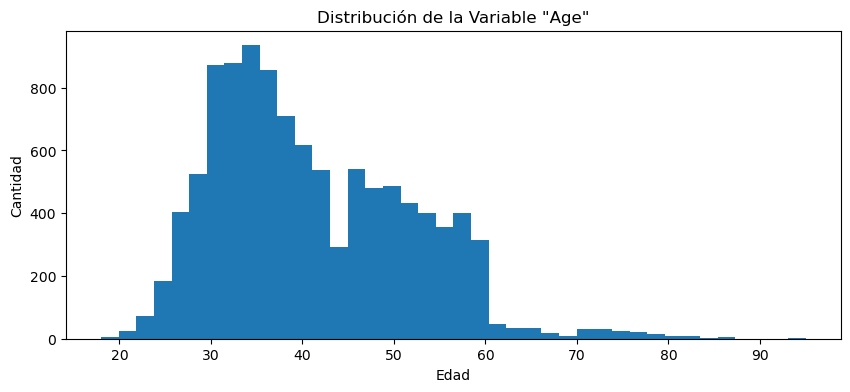

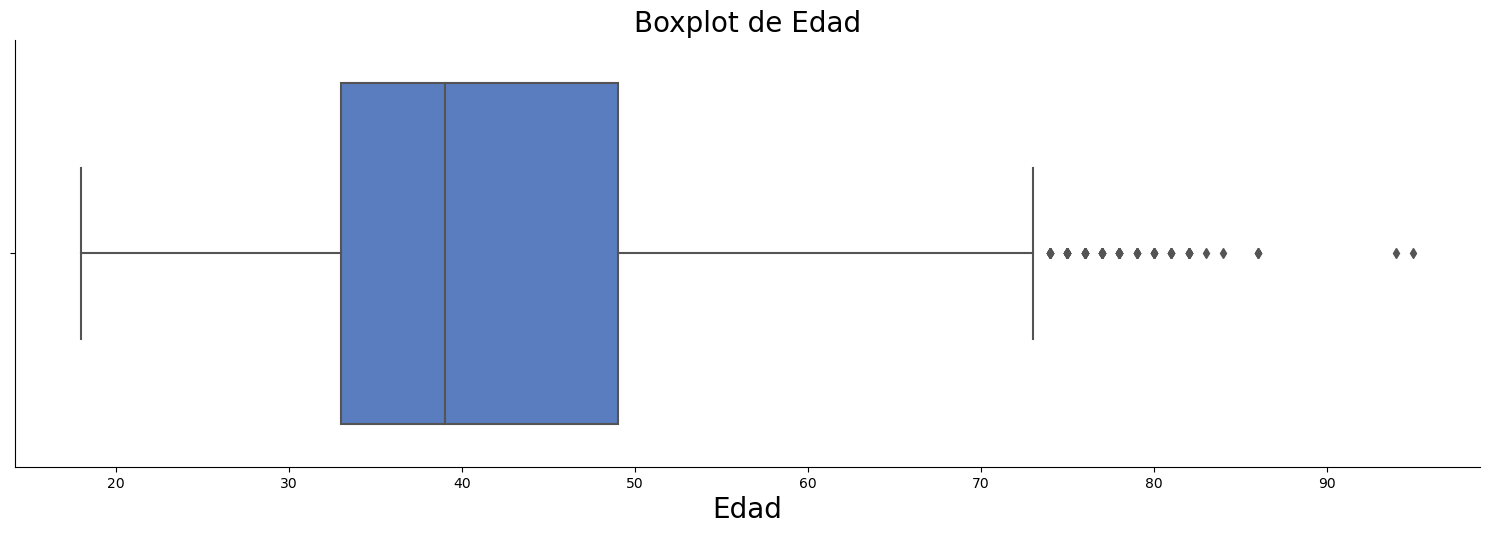

In [66]:
# Creamos un gráfico de barras para la Edad
plt.figure(figsize=(10, 4))
plt.hist(bankdf_snul['Age'], bins=40)
plt.title('Distribución de la Variable "Age"')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.show()

# Creamos un boxplot para la Edad, para visualizar outliers y concentración de datos
boxp = sns.catplot(data=bankdf_snulBAL,
                x="Age", 
                kind="box",
                palette = "muted",
                height = 5 ,aspect=3)
plt.xlabel("Edad",size = 20)
plt.title('Boxplot de Edad',size = 20)
plt.show()

Los dos gráficos combinados permiten ver la distribución de las edades de los clientes y algunos outliers, superiores a los 72 años. Al principio del análisis obtuvimos la media de la edad en 41 años, y vemos que la mediana está en 39. Esto se da porque la media está afectada por las anomalías. El 50% de los clientes están entre las edades de 33 y 49 años. 
A su vez, la distribución es relativamente suave, salvo en 60 años donde hay una gran caída. Para entenderlo se deben analizar factores externos como condiciones para jubilados. Podemos ver la distribución de las edades en los distintos trabajos.

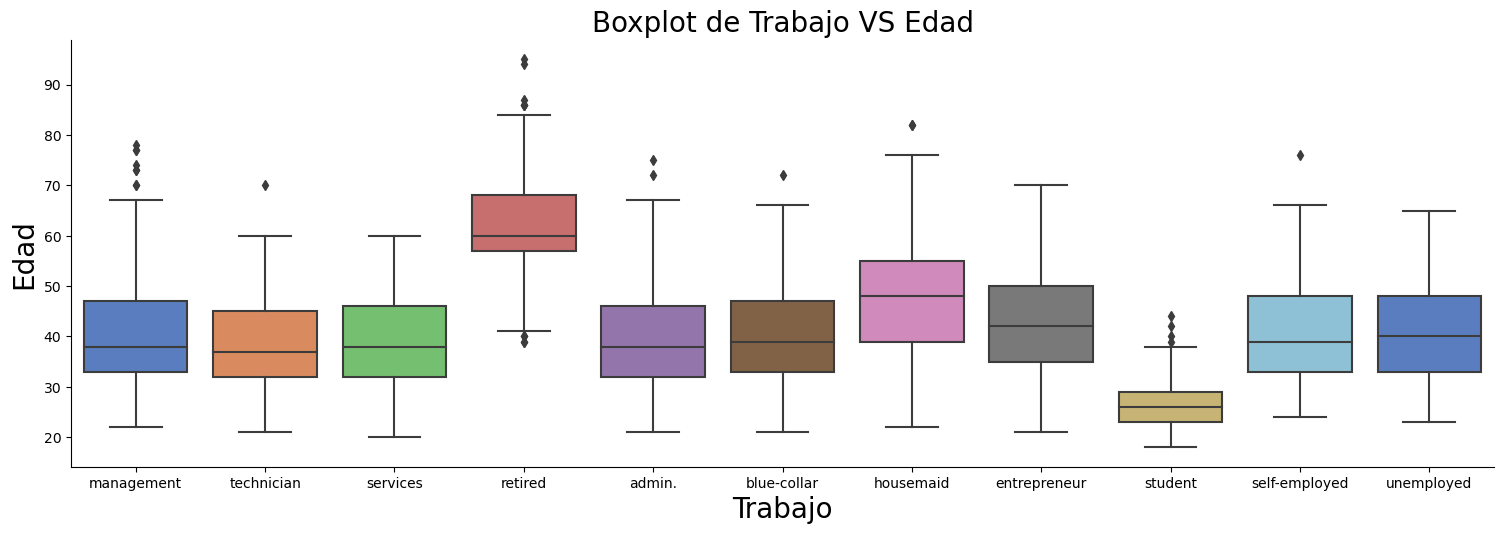

In [131]:
# Graficamos los boxplot
boxp = sns.catplot(data=jobs,
                x="Job",y="Age", 
                kind="box",
                palette = "muted",
                height = 5 ,aspect=3)
plt.xlabel("Trabajo",size = 20)
plt.ylabel("Edad",size = 20)
plt.title('Boxplot de Trabajo VS Edad',size = 20)
plt.show()

Podemos ver como los whiskers de todos los trabajos se encuentran por debajo de los 70 años con medianas alrededor de los 40 años, mientras que los jubilados poseen el 50% de su concentración entre los 60 y los 70, llegando hasta los 90 años. El único trabajo que posee una distribución más elevada son las amas de casa, con una mediana en 50 años. Siguiendo la misma lógica, la distribución de los estudiantes se encuentra entre los 20 y los 30 años.

#### **Feature: Job**
Analizaremos la distribución de los trabajos y su relación con otras variables.

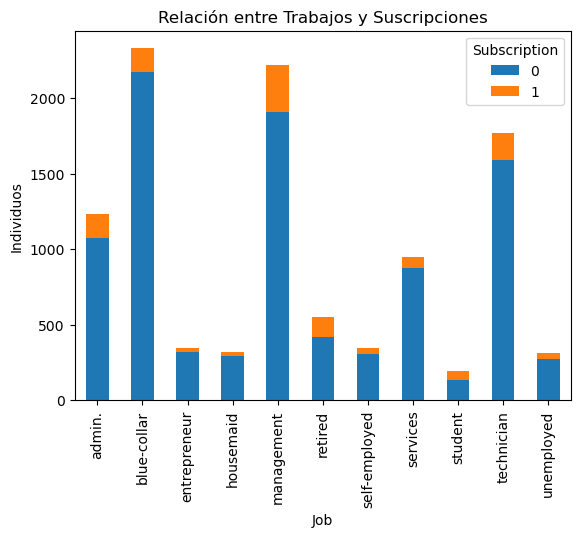

In [72]:
# Filtramos los valores 'unknown' de Jobs y eliminamos las filas correspondientes
jobs = bankdf_snul[bankdf_snul['Job'] != 'unknown']

# Contamos la frecuencia
count_dataJ = jobs.groupby(['Job', 'Subscription']).size().unstack()

# Graficamos con barras apiladas
count_dataJ.plot(kind='bar', stacked=True)
plt.xlabel('Job')
plt.ylabel('Individuos')
plt.title('Relación entre Trabajos y Suscripciones')
plt.show()


Vemos que la mayor cantidad de suscripciones proviene de admin, blue-collar, management y technicians. Esta puede ser información valiosa para asociarse con determinadas compañías o dar beneficios a ciertos tipos de trabajadores, para reclutar mayor cantidad de estos y aumentar la suscripción a las campañas. También, denotamos una importante suscripción por parte de los jubilados, por lo que puede ser otro foco.

Podemos analizar los trabajos según su balance. Antes, debemos ajustar las anomalías, ya que, como vimos al principio, los valores máximos están fuertemente alejados de la mediana, y eso dificulta el entendimiento del gráfico.

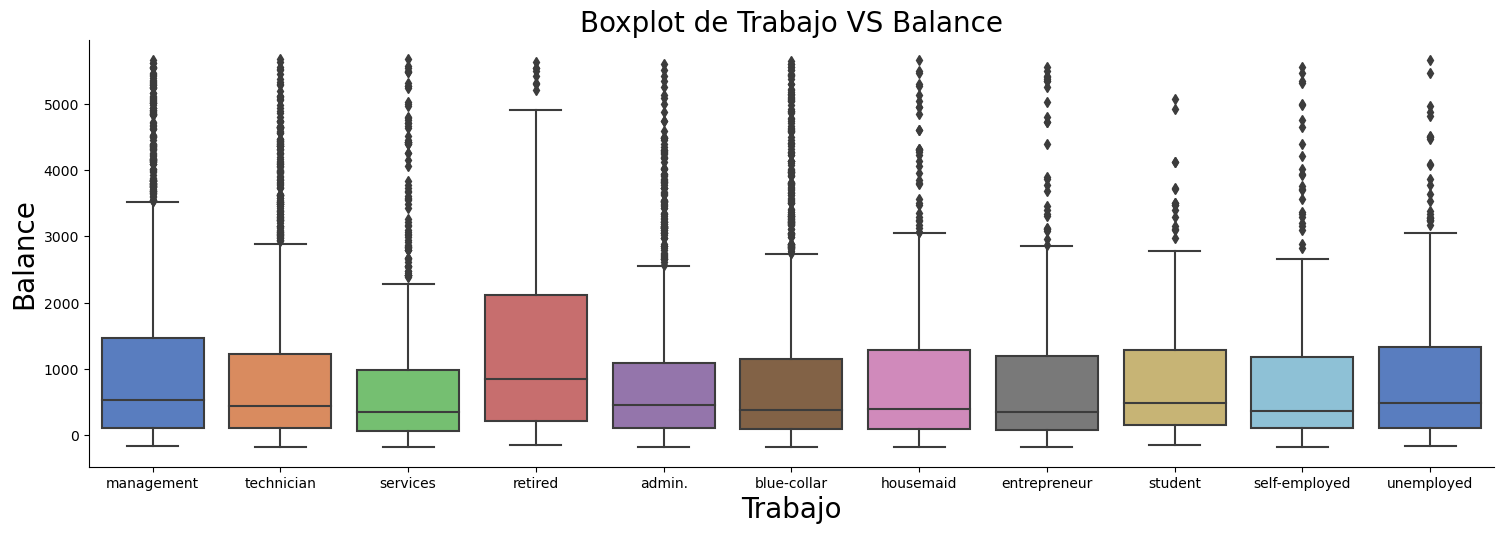

In [148]:
# Primero definimos qué valores pertenecen a cada percentil.
percentil_95 = jobs['Balance (euros)'].quantile(0.95)
percentil_5 = jobs['Balance (euros)'].quantile(0.05)

# Filtramos los outliers
bankdf_snulBAL = jobs.loc[(jobs['Balance (euros)']>=percentil_5)&(jobs['Balance (euros)']<=percentil_95)]


# Graficamos los boxplot sin las anomalías.
boxp = sns.catplot(data=bankdf_snulBAL,
                x="Job",y="Balance (euros)", 
                kind="box",
                palette = "muted",
                height = 5 ,aspect=3)
plt.xlabel("Trabajo",size = 20)
plt.ylabel("Balance",size = 20)
plt.title('Boxplot de Trabajo VS Balance',size = 20)
plt.show()

Observamos que los jubilados son quienes tienen un balance mayor en general que los otros tipos, teniendo una mediana más elevada y extendiendo los whiskers en gran medida. De los asalariados, Management es el único que destaca, con un 3 cuartil mayor al resto, pero todos los trabajos tienen un balance realtivamente similar.

#### **Feature: Balance**
Analizaremos la distribución del balance y su relación con otras variables. Para trabajar con el balance, debemos quitar las anomalías, tal como se mencionó al principio del EDA.

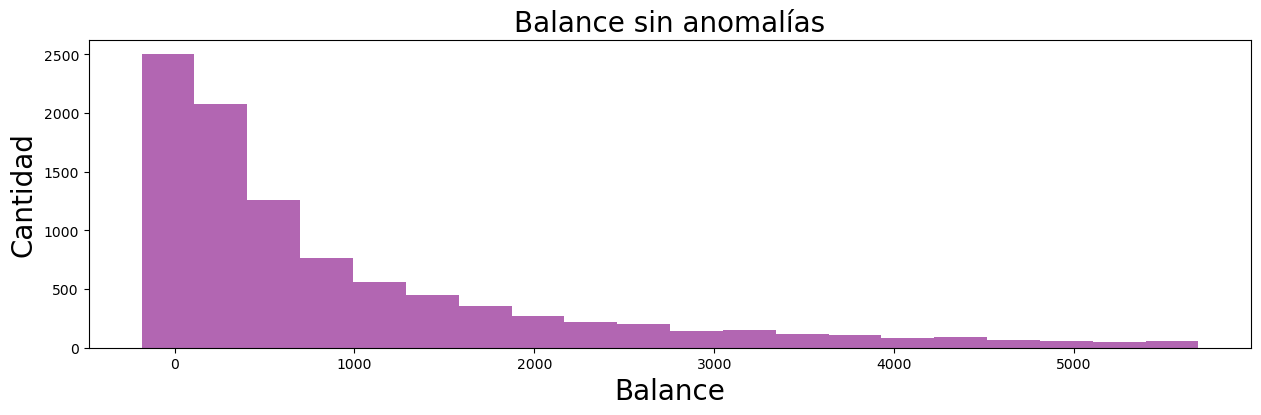

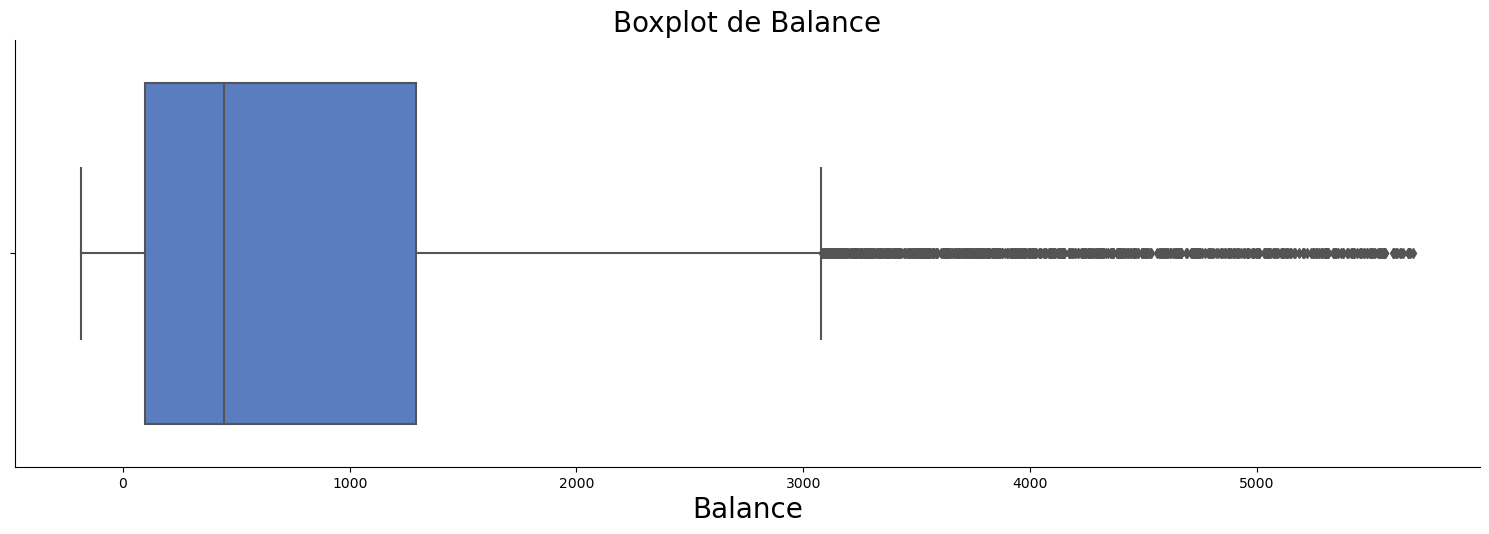

In [142]:
#Graficamos el histograma
plt.figure(figsize=(15,4))
plt.hist(bankdf_snulBAL['Balance (euros)'], bins=20,color='purple', alpha=0.6)
plt.xlabel("Balance",size = 20)
plt.ylabel("Cantidad",size = 20)
plt.title("Balance sin anomalías",size=20)
plt.show()

# Creamos un boxplot para el balance
boxp = sns.catplot(data=bankdf_snulBAL,
                x="Balance (euros)", 
                kind="box",
                palette = "muted",
                height = 5 ,aspect=3)
plt.xlabel("Balance",size = 20)
plt.title('Boxplot de Balance',size = 20)
plt.show()

Vemos que el 50% de los clientes tienen un balance entre 70 y 1400 euros, pero la distribución es muy amplia, ya que, incluso sacando los quantiles 5 y superiores al 95, tenemos gran cantidad de registros por fuera de los whiskers. Ya vimos como se comporta el Balance respecto de los trabajos, ahora podemos analizarlo en función de las edades y además observar si esos clientes se suscriben a la campaña o no. 

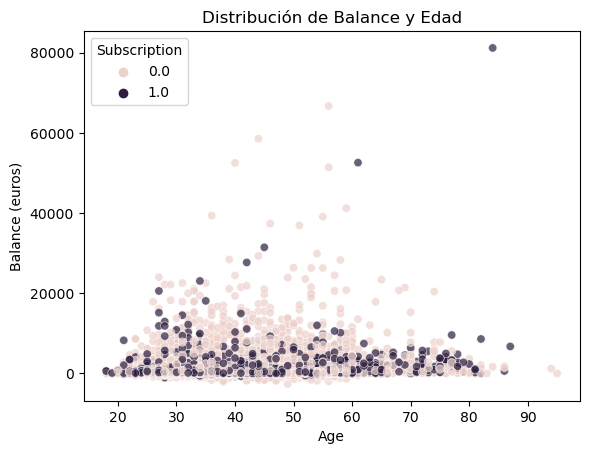

In [105]:
# Scatterplot comparando el Balance con la Edad
sns.scatterplot(data=bankdf_snul, x="Age", y="Balance (euros)",hue="Subscription", alpha=0.7)
plt.title("Distribución de Balance y Edad")
plt.show()

Vemos que, por más que los retirados demostraban tener un mayor balance en general, los valores más altos para el balance se dan en las edades alrededor de 40 y 60 años, con algunos reigstros de valores muy altos. A su vez, notamos que a mayor balance, menor suscripción a la campaña.

#### **Feature: Education**
Analizaremos la distribución del education y su relación con otras variables. 

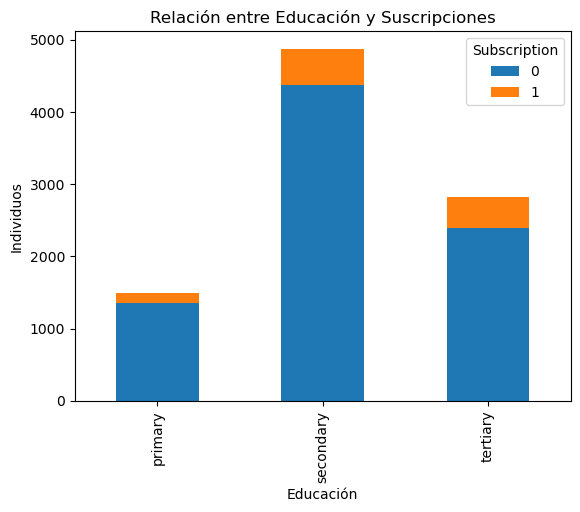

In [128]:
# Filtramos los valores 'unknown' de Education y eliminamos las filas correspondientes
educ = bankdf_snulBAL[bankdf_snulBAL['Education'] != 'unknown']

# Contamos la frecuencia
count_dataE = educ.groupby(['Education', 'Subscription']).size().unstack()

# Graficamos con barras apiladas
count_dataE.plot(kind='bar', stacked=True)
plt.xlabel('Educación')
plt.ylabel('Individuos')
plt.title('Relación entre Educación y Suscripciones')
plt.show()


Vemos que la mayor cantidad de suscriptores se encuentran en clientes cuya educación máxima fue secundaria o terciaria. A continuación, visualizaremos el balance para cada tipo de educación.

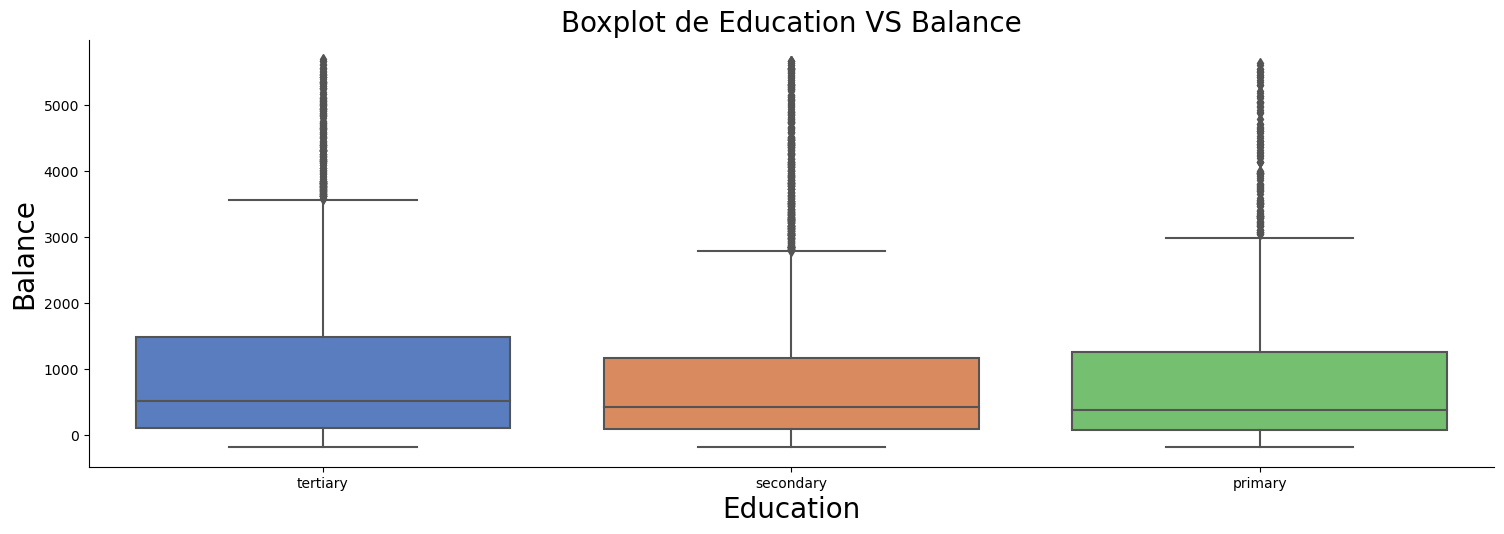

In [127]:
# Boxplot para education respecto del balance
boxp = sns.catplot(data=educ,
                x="Education",y="Balance (euros)", 
                kind="box",
                palette = "muted",
                height = 5 ,aspect=3)
plt.xlabel("Education",size = 20)
plt.ylabel("Balance",size = 20)
plt.title('Boxplot de Education VS Balance',size = 20)
plt.show()

Contrario a lo que se podría esperar, la mediana de todos los clientes con distintos tipos de educación se encuentra al mismo nivel, teniendo una distribución un poco más amplia y elevada para los terciarios, pero sin signficar una gran diferencia respecto de las otras dos educaciones máximas. 

#### **Análisis de las variables restantes**
A continuación, analizaremos la distribución de las demás variables numéricas. Para eso, utilizaremos boxplots.

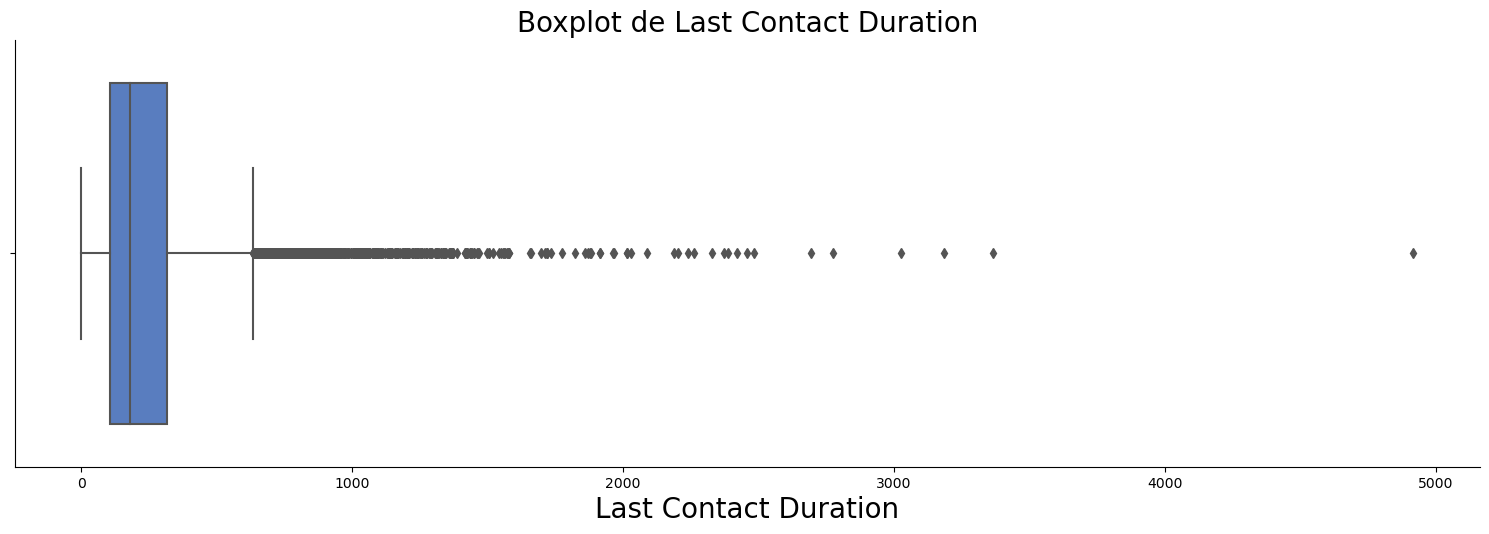

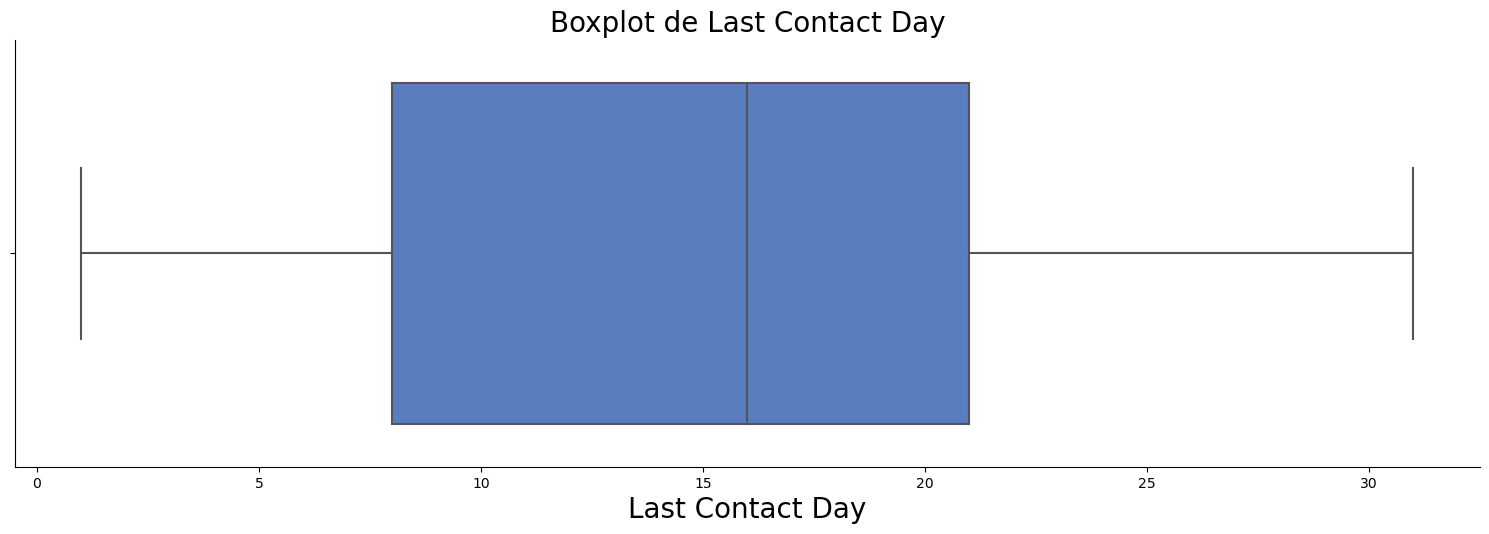

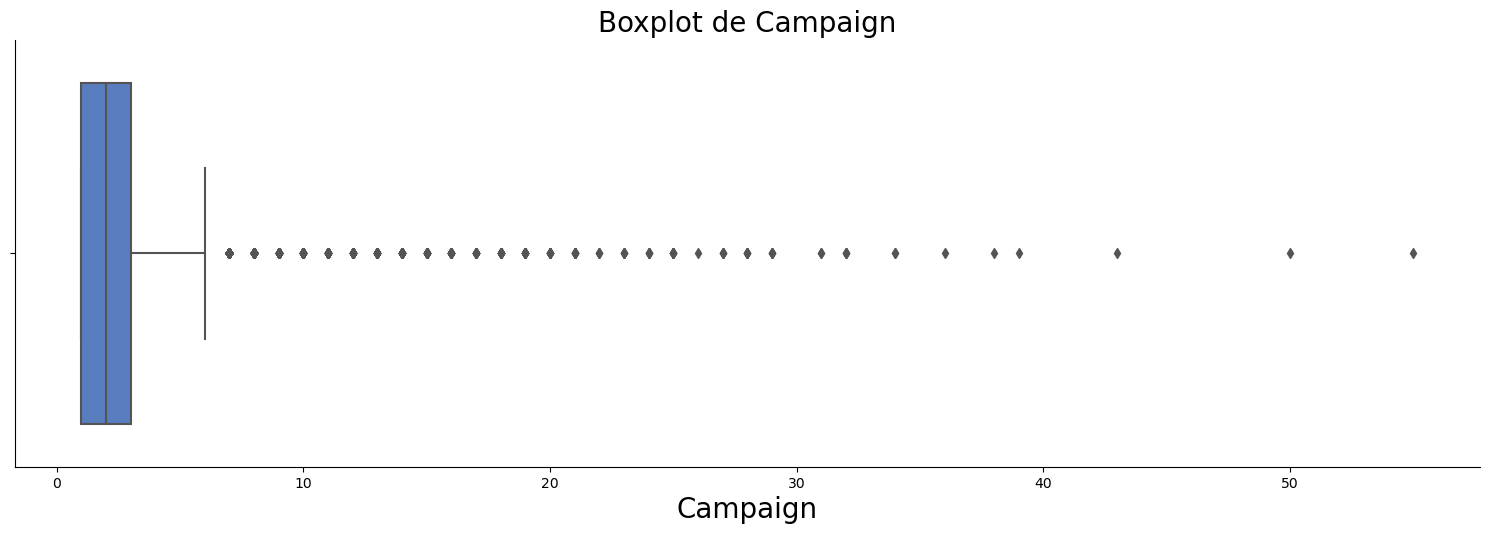

In [147]:
# Creamos un boxplot para Last Contact Duration
boxp = sns.catplot(data=bankdf_snul,
                x="Last Contact Duration", 
                kind="box",
                palette = "muted",
                height = 5 ,aspect=3)
plt.xlabel("Last Contact Duration",size = 20)
plt.title('Boxplot de Last Contact Duration',size = 20)
plt.show()

# Creamos un boxplot para Last Contact Day
boxp = sns.catplot(data=bankdf_snul,
                x="Last Contact Day", 
                kind="box",
                palette = "muted",
                height = 5 ,aspect=3)
plt.xlabel("Last Contact Day",size = 20)
plt.title('Boxplot de Last Contact Day',size = 20)
plt.show()

# Creamos un boxplot para Campaign
boxp = sns.catplot(data=bankdf_snul,
                x="Campaign", 
                kind="box",
                palette = "muted",
                height = 5 ,aspect=3)
plt.xlabel("Campaign",size = 20)
plt.title('Boxplot de Campaign',size = 20)
plt.show()

Las conclusiones son:
- Para la duración del último contacto, vemos que la mediana se encuentra alrededor de los 3 minutos, y que el 75% no supera los 10 minutos. Sin embargo, hay gran presencia de outliers, lo que indica que hay contactos de mucha mayor duración. 
- Para el día de contacto, vemos que la distribución es bastante uniforme, teniendo contactos todos los días del mes, con una mayor concentración entre los días 16 y 21, pero sin ser lo suficientemente notorio el aumento de contactos en esas fechas.
- Para las campañas, vemos que el 75% de los clientes fueron contactados menos de 4 veces, aunque, por la amplia presencia de outliers, notamos que hay clientes que fueron contactados muchas veces más. 

#### **Análisis complementarios**
A continuación, analizaremos la relación que tiene la variable suscripción con otras variables que no fueron mencionadas anteriormente. 

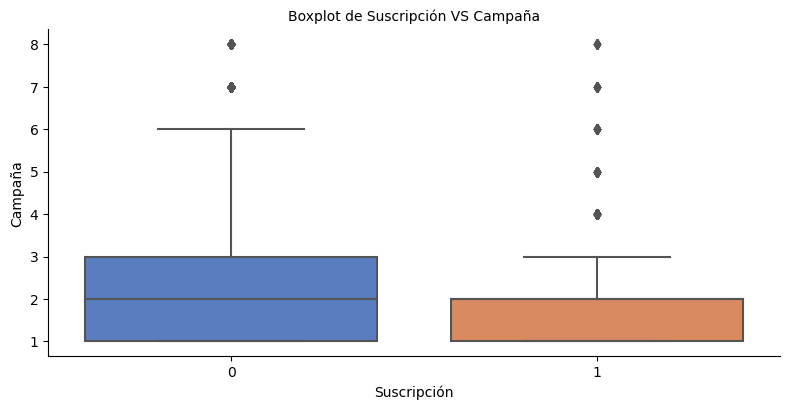

In [139]:
#Primero definimos qué valores pertenecen a cada percentil.
percentil_95 = bankdf_snul['Campaign'].quantile(0.95)
percentil_5 = bankdf_snul['Campaign'].quantile(0.05)

#Filtramos los outliers
bankdf_snulCAM = bankdf_snul.loc[(bankdf_snul['Campaign']>=percentil_5)&(bankdf_snul['Campaign']<=percentil_95)]

# Todas las categorias
boxp = sns.catplot(data=bankdf_snulCAM,
                x="Subscription",y="Campaign", 
                kind="box",
                palette = "muted",
                height = 4 ,aspect=2)
plt.xlabel("Suscripción",size = 10)
plt.ylabel("Campaña",size = 10)
plt.title('Boxplot de Suscripción VS Campaña',size = 10)
plt.show()

Anteriormente, junto con el análisis del pairplot, se mencionó que se denotaba una tendencia de que a mayor cantidad de contactos durante la campaña, mayor era el fracaso de esta. Esto es avalado por el boxplot presentado, donde vemos que la mediana de los contactos para los no suscriptos es 2 y que sus whiskers llegan hasta 6, mientras que la mediana de los suscriptos es 1 y su whisker llega a 3. Esto no implica una causalidad directa, pero si un foco para analizar, ya que puede suceder que aquellos que son contactados con mayor frecuencia sientan molestia y por lo tanto, rechacen la campaña. 

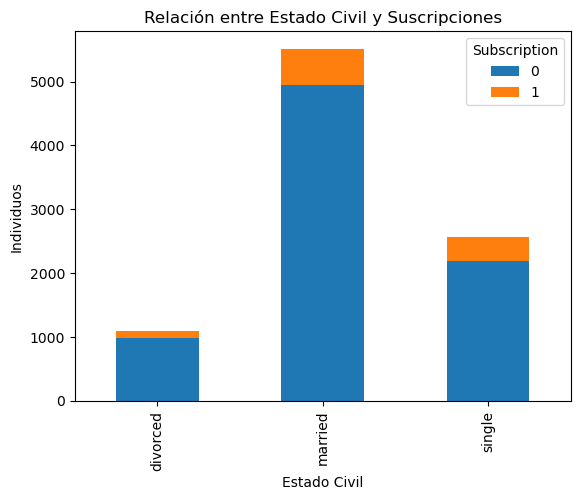

In [117]:
# Filtramos los valores 'unknown' de Education y eliminamos las filas correspondientes
marital = bankdf_snul[bankdf_snul['Marital Status'] != 'unknown']

# Contamos la frecuencia
count_dataMS = educ.groupby(['Marital Status', 'Subscription']).size().unstack()

# Graficamos con barras apiladas
count_dataMS.plot(kind='bar', stacked=True)
plt.xlabel('Estado Civil')
plt.ylabel('Individuos')
plt.title('Relación entre Estado Civil y Suscripciones')
plt.show()


De manera curiosa, la distribución del Estado Civil es muy similar a la distribución de la Educación. Obtenemos una mayor cantidad de suscriptores en las personas casadas y solteras.

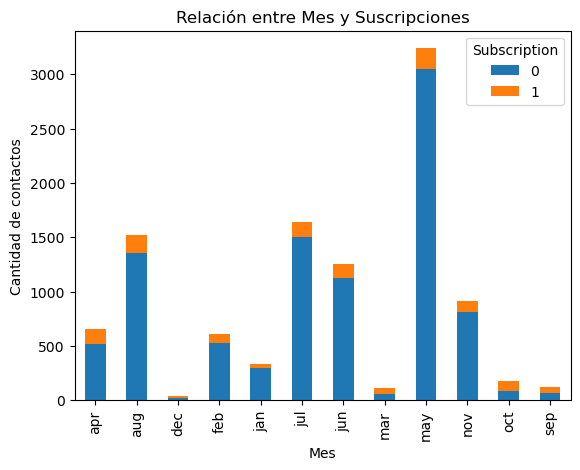

In [126]:
# Contamos la frecuencia
count_dataMonth = bankdf_snul.groupby(['Last Contact Month', 'Subscription']).size().unstack()

# Graficamos con barras apiladas
count_dataMonth.plot(kind='bar', stacked=True)
plt.xlabel('Mes')
plt.ylabel('Cantidad de contactos')
plt.title('Relación entre Mes y Suscripciones')
plt.show()

Vemos que los meses de mayor contacto son de Mayo a Agosto, teniendo estos la mayor cantidad de suscripciones, junto con Abril. Esta mayor cantidad de contactos puede ser porque se lanzó la campaña en esa época y hubo mayores esfuerzos en promocionarla en aquel período. Sin embargo, creemos que la mayor cantidad de suscripciones no tiene relación directa con el mes en sí.